In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
pip install yfinance

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:
      Successfully uninstalled lxml-4.6.3
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


In [13]:
import pandas_datareader as data
import datetime

In [22]:
import yfinance as yf

symbol = "AAPL"
start_date = "2010-01-01"
end_date = "2022-12-31"

df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [23]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401019,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443576,447610800


In [24]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.412415,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.731918,77034200


In [25]:
df =df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401019,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443576,447610800


In [26]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


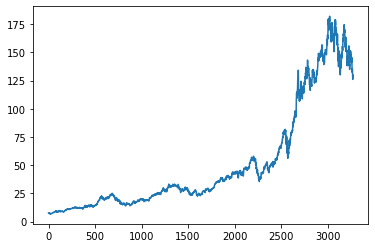

In [27]:
plt.plot(df.Close)

In [28]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3267,130.919998,132.419998,129.639999,131.860001,63814900
3268,131.380005,131.410004,128.720001,130.029999,69007800
3269,129.669998,131.029999,125.870003,126.040001,85438400
3270,127.989998,130.479996,127.730003,129.610001,75703700


In [29]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

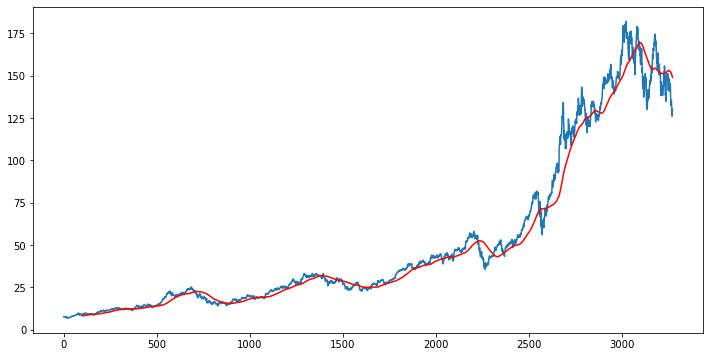

In [30]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [31]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    152.1331
3268    152.0096
3269    151.8867
3270    151.7593
3271    151.6110
Name: Close, Length: 3272, dtype: float64

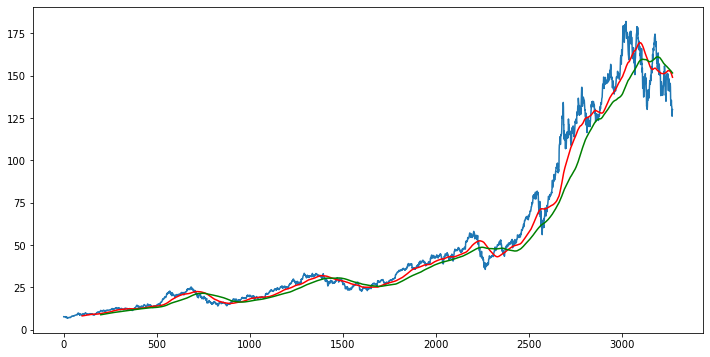

In [32]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [33]:
df.shape

(3272, 5)

In [35]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


In [36]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [37]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [39]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [42]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [43]:
#ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()

model.add(LSTM(units=50,activation = "relu",return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation = "relu",return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation = "relu",return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [45]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
69/69 [==============================] - 18s 193ms/step - loss: 0.0286
Epoch 2/50
69/69 [==============================] - 12s 181ms/step - loss: 0.0069
Epoch 3/50
69/69 [==============================] - 12s 179ms/step - loss: 0.0057
Epoch 4/50
69/69 [==============================] - 13s 189ms/step - loss: 0.0048
Epoch 5/50
69/69 [==============================] - 13s 182ms/step - loss: 0.0039
Epoch 6/50
69/69 [==============================] - 13s 186ms/step - loss: 0.0042
Epoch 7/50
69/69 [==============================] - 14s 197ms/step - loss: 0.0038
Epoch 8/50
69/69 [==============================] - 13s 186ms/step - loss: 0.0035
Epoch 9/50
69/69 [==============================] - 16s 229ms/step - loss: 0.0046
Epoch 10/50
69/69 [==============================] - 15s 218ms/step - loss: 0.0035
Epoch 11/50
69/69 [==============================] - 14s 198ms/step - loss: 0.0036
Epoch 12/50
69/69 [==============================] - 12s 178ms/step - loss: 0.0031
Epoch 13/50
6

In [46]:
model.save('keras_model.h5')

In [47]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [48]:
past_100_days = data_training.tail(100)

In [50]:
final_df = past_100_days.append(data_testing,ignore_index=True)

In [51]:
final_df.head()

,Close
0,55.959999
1,54.470001
2,54.560001
3,54.592499
4,55.007500


In [52]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.13937014],
       [0.1291969 ],
       [0.1298114 ],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [53]:
input_data.shape

(1082, 1)

In [54]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [56]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [57]:
# Make predictions
y_predicted = model.predict(x_test)

In [58]:
y_predicted.shape

(982, 1)

In [59]:
scaler.scale_

array([0.00682769])

In [60]:
scale_factor = 1/0.00682769
y_predicted = y_predicted*scale_factor
y_test = y_test * scale_factor

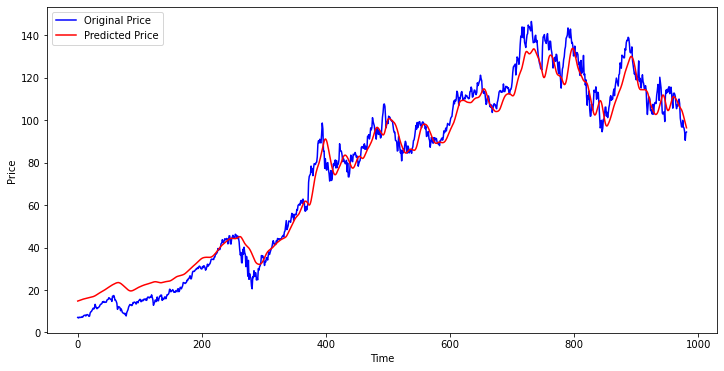

In [61]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()